In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
df = pd.read_csv("/content/drive/MyDrive/ASE_Lab/heart.csv")

features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
layer=2
neuron=100
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=len(features)))
for i in range(1,layer):
  model.add(Dense(neuron, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)

y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("DNN Accuracy:", accuracy)


In [4]:
layers=2
neurons=400

12/12 [==============================] - 0s 6ms/step


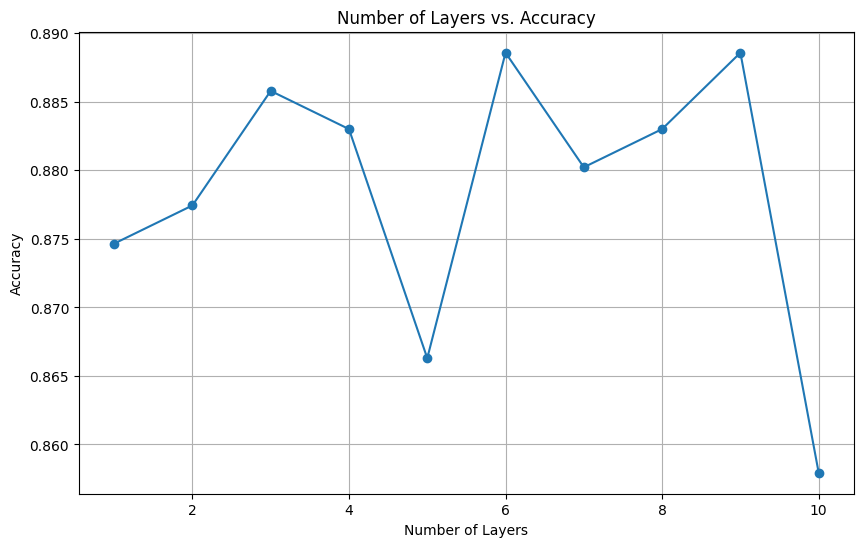

In [5]:
#Changing Layer Values
layer_values = range(1, 11)
accuracy_values = []

for layers in layer_values:
    model = Sequential()
    model.add(Dense(500, activation='relu', input_dim=len(features)))
    for i in range(1, layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=60, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(layer_values, accuracy_values, marker='o', linestyle='-')
plt.title('Number of Layers vs. Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 4ms/step


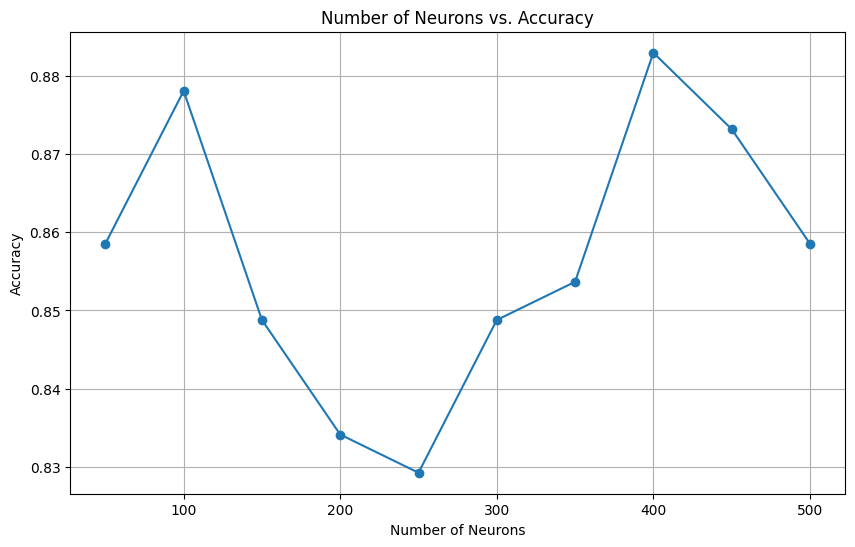

In [4]:
#Changing neuron values
neuron_values = range(50, 501, 50)#values range from 50 t0 500 with interval of 50
accuracy_values = []

for neurons in neuron_values:#accessing the values in the neurons_values list.
    model = Sequential()
    model.add(Dense(500, activation='relu', input_dim=len(features)))
    for i in range(1, layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=60, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(neuron_values, accuracy_values, marker='o', linestyle='-')
plt.title('Number of Neurons vs. Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 5ms/step


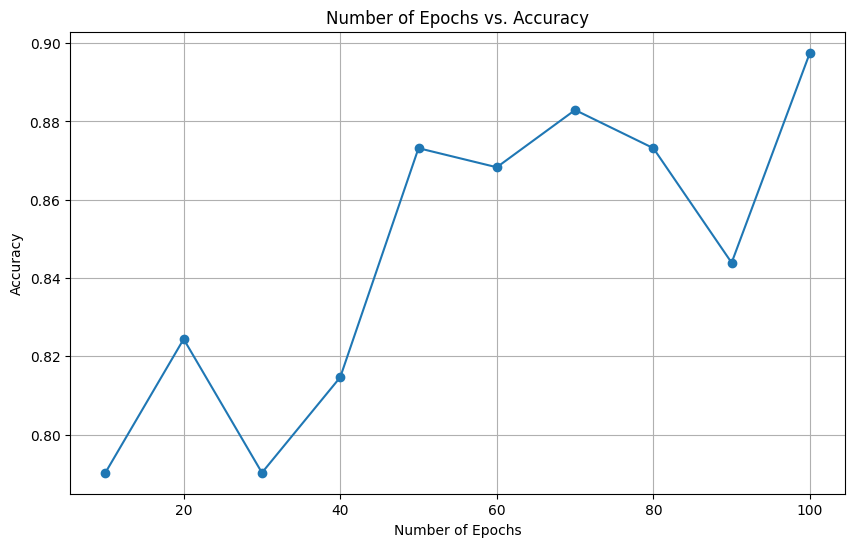

In [5]:
#Changing epoch vaules
epoch_values = range(10, 101, 10)
accuracy_values = []

for epochs in epoch_values:
    model = Sequential()
    model.add(Dense(500, activation='relu', input_dim=len(features)))
    for i in range(1, layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(epoch_values, accuracy_values, marker='o', linestyle='-')
plt.title('Number of Epochs vs. Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


31/31 [==============================] - 0s 5ms/step


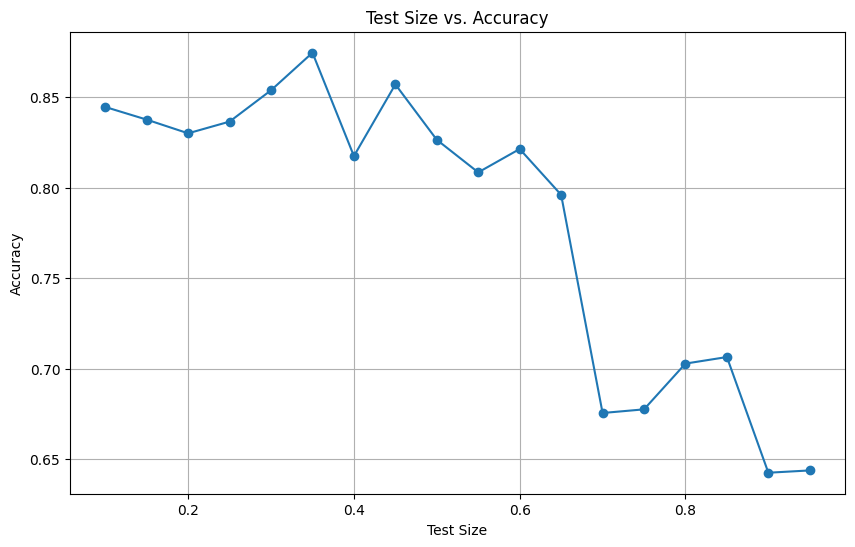

In [6]:
#changing test sizes
test_sizes = np.arange(0.1, 0.96, 0.05)#0.1 to 0.96 with interval of 0.05
accuracy_values = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    model = Sequential()
    model.add(Dense(500, activation='relu', input_dim=len(features)))
    for i in range(1, layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=60, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_values, marker='o', linestyle='-')
plt.title('Test Size vs. Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
